# Type B Models Only ipHash, filter_str, port, whereDetected, regexDetected, emptyFilter, label

In [25]:
import sklearn
import pandas
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [26]:
data = pandas.read_csv("../Dataset/final.csv")
data.head()

t                        filter_str  \
0  1.712243e+09  {'user': '{}', 'password': '{}'}   
1  1.712243e+09  {'user': '{}', 'password': '{}'}   
2  1.712243e+09   {'username': {'$regex': '^{}'}}   
3  1.712243e+09   {'username': {'$regex': '^{}'}}   
4  1.712243e+09       {'username': {'$ne': '{}'}}   

                                docUUID                       denamed  \
0  e5e23d7e-5367-4829-a104-ca369c49d4dc  {'name': '{}', 'name': '{}'}   
1  e5e23d7e-5367-4829-a104-ca369c49d4dc  {'name': '{}', 'name': '{}'}   
2  e5e23d7e-5367-4829-a104-ca369c49d4dc   {'name': {'$regex': '^{}'}}   
3  e5e23d7e-5367-4829-a104-ca369c49d4dc   {'name': {'$regex': '^{}'}}   
4  e5e23d7e-5367-4829-a104-ca369c49d4dc       {'name': {'$ne': '{}'}}   

  FindCollectionTarget FindCollectionTargetdeNamed  queryLength      ipHash  \
0      test_collection             test_collection           32  2130706433   
1      test_collection             test_collection           32  2130706433   
2      test_collection             test_collection           31  2130706433   
3      test_collection             test_collection           31  2130706433   
4      test_collection             test_collection           27  2130706433   

    port  whereDetected  regexDetected  emptyFilter  nullArgument  \
0  47038              0              0            0             1   
1  47038              0              0            0             1   
2  47038              0              1            0             1   
3  47038              0              1            0             1   
4  47038              0              0            0             1   

   logicOperator             db      denamedDb  nreturned  cpuNanos  label  \
0              0  test_database  test_database        0.0    176371    0.0   
1              0  test_database  test_database        0.0    176371    0.0   
2              0  test_database  test_database        0.0    112781    1.0   
3              0  test_database  test_database        0.0    112781    1.0   
4              1  test_database  test_database        0.0     71093    1.0   

   planningTimeMicros  
0                83.0  
1                83.0  
2                71.0  
3                71.0  
4                42.0

In [27]:
features = data[data.columns.difference(['label','filter_str','FindCollectionTarget'])]
target = data['label']
features.head()

FindCollectionTargetdeNamed  cpuNanos             db  \
0             test_collection    176371  test_database   
1             test_collection    176371  test_database   
2             test_collection    112781  test_database   
3             test_collection    112781  test_database   
4             test_collection     71093  test_database   

                        denamed      denamedDb  \
0  {'name': '{}', 'name': '{}'}  test_database   
1  {'name': '{}', 'name': '{}'}  test_database   
2   {'name': {'$regex': '^{}'}}  test_database   
3   {'name': {'$regex': '^{}'}}  test_database   
4       {'name': {'$ne': '{}'}}  test_database   

                                docUUID  emptyFilter      ipHash  \
0  e5e23d7e-5367-4829-a104-ca369c49d4dc            0  2130706433   
1  e5e23d7e-5367-4829-a104-ca369c49d4dc            0  2130706433   
2  e5e23d7e-5367-4829-a104-ca369c49d4dc            0  2130706433   
3  e5e23d7e-5367-4829-a104-ca369c49d4dc            0  2130706433   
4  e5e23d7e-5367-4829-a104-ca369c49d4dc            0  2130706433   

   logicOperator  nreturned  nullArgument  planningTimeMicros   port  \
0              0        0.0             1                83.0  47038   
1              0        0.0             1                83.0  47038   
2              0        0.0             1                71.0  47038   
3              0        0.0             1                71.0  47038   
4              1        0.0             1                42.0  47038   

   queryLength  regexDetected             t  whereDetected  
0           32              0  1.712243e+09              0  
1           32              0  1.712243e+09              0  
2           31              1  1.712243e+09              0  
3           31              1  1.712243e+09              0  
4           27              0  1.712243e+09              0

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack
scaler = MinMaxScaler()
vectScale = MinMaxScaler()
vectorizer = TfidfVectorizer()
featuresVect = vectorizer.fit_transform(features['denamed'])
featuresNum = data[['emptyFilter','whereDetected','nullArgument','logicOperator']].values
print("Shape of featuresVect:", featuresVect.shape)
print("Shape of featuresNum:", featuresNum.shape)
featuresConcat = hstack((featuresVect, featuresNum))
scaledFeaturesNum = scaler.fit_transform(featuresNum)
scaledFeaturesVect = vectScale.fit_transform(featuresVect.toarray())
scaledFeaturesConcat = hstack((featuresVect,scaledFeaturesNum))

Shape of featuresVect: (224, 44)
Shape of featuresNum: (224, 4)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featuresConcat, target, test_size=0.2)
X_trainS, X_testS, y_trainS, y_testS = train_test_split(scaledFeaturesConcat, target, test_size=0.2)

In [30]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

svm_A_liner = SVC(kernel="linear",verbose=1)
svm_A_poly = SVC(kernel="poly",verbose=1)
svm_A_rbf = SVC(kernel="rbf",verbose=1)
svm_A_sig = SVC(kernel="sigmoid",verbose=1)
log_A = LogisticRegression(verbose=1)
randF_A = RandomForestClassifier(verbose=1)
gbc_A = GradientBoostingClassifier(verbose=1)
knn = KNeighborsClassifier(n_neighbors=7)
dt_clf = DecisionTreeClassifier()
bag_dt = BaggingClassifier()
ada_dt = AdaBoostClassifier()
vote = VotingClassifier
bayes = MultinomialNB()

In [31]:
svm_A_liner.fit(X_trainS,y_trainS)
svm_A_poly.fit(X_train,y_train)
svm_A_rbf.fit(X_train,y_train)
svm_A_sig.fit(X_train,y_train)
log_A.fit(X_train,y_train)
randF_A.fit(X_train,y_train)
gbc_A.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt_clf.fit(X_train,y_train)
bag_dt.fit(X_train,y_train)
ada_dt.fit(X_train,y_train)
#vote.fit(X_train,y_train)
bayes.fit(X_train,y_train)

[LibSVM]*
optimization finished, #iter = 98
obj = -117.184143, rho = 0.218754
nSV = 136, nBSV = 122
Total nSV = 136
[LibSVM]*
optimization finished, #iter = 126
obj = -99.632673, rho = 0.402696
nSV = 128, nBSV = 109
Total nSV = 128
[LibSVM]*
optimization finished, #iter = 126
obj = -97.086602, rho = 0.571615
nSV = 132, nBSV = 97
Total nSV = 132
[LibSVM]*
optimization finished, #iter = 106
obj = -128.457829, rho = 0.495614
nSV = 146, nBSV = 129
Total nSV = 146
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           49     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24073D+02    |proj g|=  1.11062D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gr

      Iter       Train Loss   Remaining Time 


 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


         1           1.3392            0.24s
         2           1.3032            0.20s
         3           1.2731            0.20s
         4           1.2416            0.19s
         5           1.2199            0.20s
         6           1.1964            0.18s
         7           1.1764            0.16s
         8           1.1620            0.15s
         9           1.1358            0.14s
        10           1.1134            0.14s
        20           0.9916            0.10s
        30           0.9345            0.08s
        40           0.8962            0.06s
        50           0.8635            0.05s
        60           0.8340            0.04s
        70           0.8114            0.03s
        80           0.7968            0.02s
        90           0.7801            0.01s
       100           0.7667            0.00s


GaussianNB()

Classification Report for Poly SVM:
              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        25
         1.0       0.55      0.55      0.55        20

    accuracy                           0.60        45
   macro avg       0.59      0.59      0.59        45
weighted avg       0.60      0.60      0.60        45

Classification Report for RBF SVM:
              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65        25
         1.0       0.57      0.60      0.59        20

    accuracy                           0.62        45
   macro avg       0.62      0.62      0.62        45
weighted avg       0.62      0.62      0.62        45

Classification Report for Sigmoid SVM:
              precision    recall  f1-score   support

         0.0       0.61      0.68      0.64        25
         1.0       0.53      0.45      0.49        20

    accuracy                           0.58        45
   macro avg      

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.62      0.80      0.70        25
         1.0       0.62      0.40      0.48        20

    accuracy                           0.62        45
   macro avg       0.62      0.60      0.59        45
weighted avg       0.62      0.62      0.61        45

Classification Report for Decsion Tree:
              precision    recall  f1-score   support

         0.0       0.64      0.72      0.68        25
         1.0       0.59      0.50      0.54        20

    accuracy                           0.62        45
   macro avg       0.62      0.61      0.61        45
weighted avg       0.62      0.62      0.62        45

Classification Report for Bagging:
              precision    recall  f1-score   support

         0.0       0.64      0.72      0.68        25
         1.0       0.59      0.50      0.54        20

    accuracy                           0.62        45
   macro avg       0.6

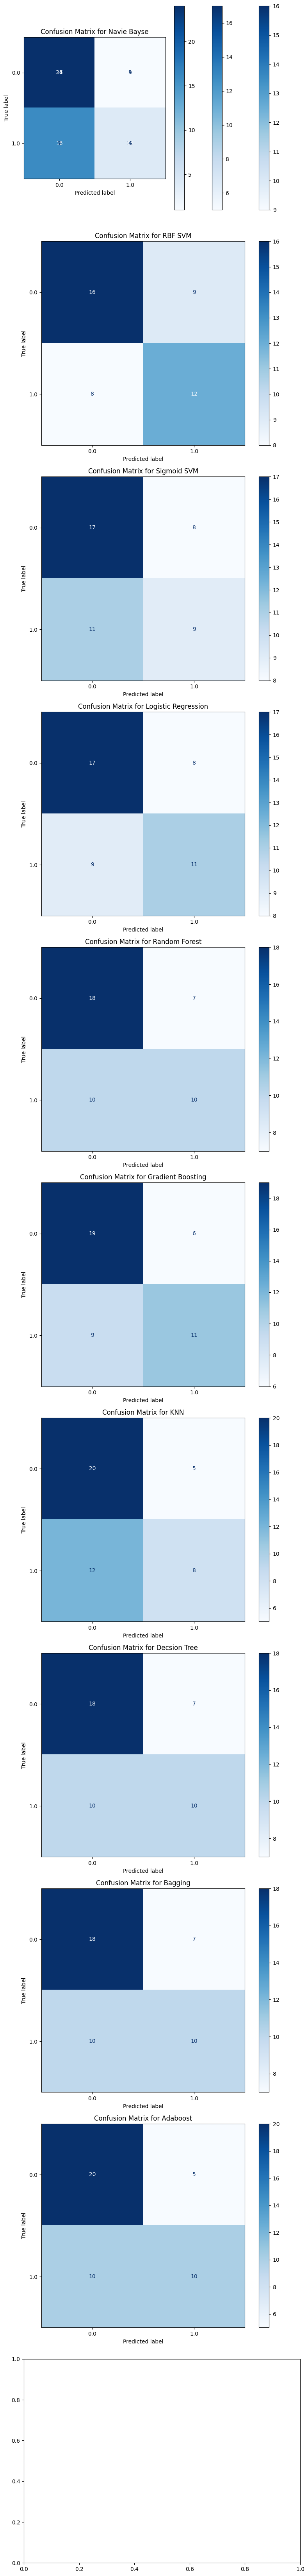

                  Model  Accuracy  Precision    Recall        F1
0              Poly SVM  0.600000   0.550000  0.550000  0.550000
1               RBF SVM  0.622222   0.571429  0.600000  0.585366
2           Sigmoid SVM  0.577778   0.529412  0.450000  0.486486
3   Logistic Regression  0.622222   0.578947  0.550000  0.564103
4         Random Forest  0.622222   0.588235  0.500000  0.540541
5     Gradient Boosting  0.666667   0.647059  0.550000  0.594595
6                   KNN  0.622222   0.615385  0.400000  0.484848
7          Decsion Tree  0.622222   0.588235  0.500000  0.540541
8               Bagging  0.622222   0.588235  0.500000  0.540541
9              Adaboost  0.666667   0.666667  0.500000  0.571429
10           Linear SVM  0.733333   0.761905  0.695652  0.727273
11          Navie Bayse  0.622222   0.800000  0.200000  0.320000


In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse import csr_matrix
# Define the scaled models
modelsScaled = {
    "Linear SVM": svm_A_liner
}

# Define the unscaled models
models = {
    "Poly SVM": svm_A_poly,
    "RBF SVM": svm_A_rbf,
    "Sigmoid SVM" : svm_A_sig,
    "Logistic Regression": log_A,
    "Random Forest": randF_A,
    "Gradient Boosting": gbc_A,
    "KNN": knn,
    "Decsion Tree" : dt_clf,
    "Bagging" : bag_dt,
    "Adaboost" : ada_dt,
    #"Voting" : vote,
    "Navie Bayse" : bayes
}

# Function to plot confusion matrix for each model
def plot_confusion_matrix(model, X, y, title):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(title)

# Function to print classification report and collect metrics
def print_classification_report_and_collect_metrics(model, X, y, name):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    ps = precision_score(y, y_pred, zero_division=1)
    recall = recall_score(y, y_pred, zero_division=1)
    f1 = f1_score(y, y_pred, zero_division=1)
    report = classification_report(y, y_pred, zero_division=1)
    print(f"Classification Report for {name}:")
    print(report)
    metrics_list.append({'Model': name, 'Accuracy': acc, 'Precision': ps, 'Recall': recall, 'F1': f1})


# Create subplots
fig, axs = plt.subplots(nrows=len(modelsScaled) + len(models), ncols=1, figsize=(8, 6*(len(modelsScaled) + len(models))))
metrics_list = []

# Plot confusion matrices and print classification report for unscaled models
for idx, (name, model) in enumerate(models.items()):
    ax = axs[idx]
    plot_confusion_matrix(model, X_test, y_test, f"Confusion Matrix for {name}")
    print_classification_report_and_collect_metrics(model, X_test, y_test, name)

# Plot confusion matrices and print classification report for scaled models
for idx, (name, model) in enumerate(modelsScaled.items()):
    ax = axs[idx]
    plot_confusion_matrix(model, X_testS, y_testS, f"Confusion Matrix for {name}")
    print_classification_report_and_collect_metrics(model, X_testS, y_testS, name)
    
for idx, (name, model) in enumerate(bModels.items()):
    ax = axs[idx]
    plot_confusion_matrix(model, X_test.toarray(), y_test, f"Confusion Matrix for {name}")
    print_classification_report_and_collect_metrics(model, X_test.toarray(), y_test, name)

plt.tight_layout()
plt.show()

metrics_df = pandas.DataFrame(metrics_list)
print(metrics_df)

# Save the metrics table to a file
metrics_df.to_csv('model_metricsB2.csv', index=False)


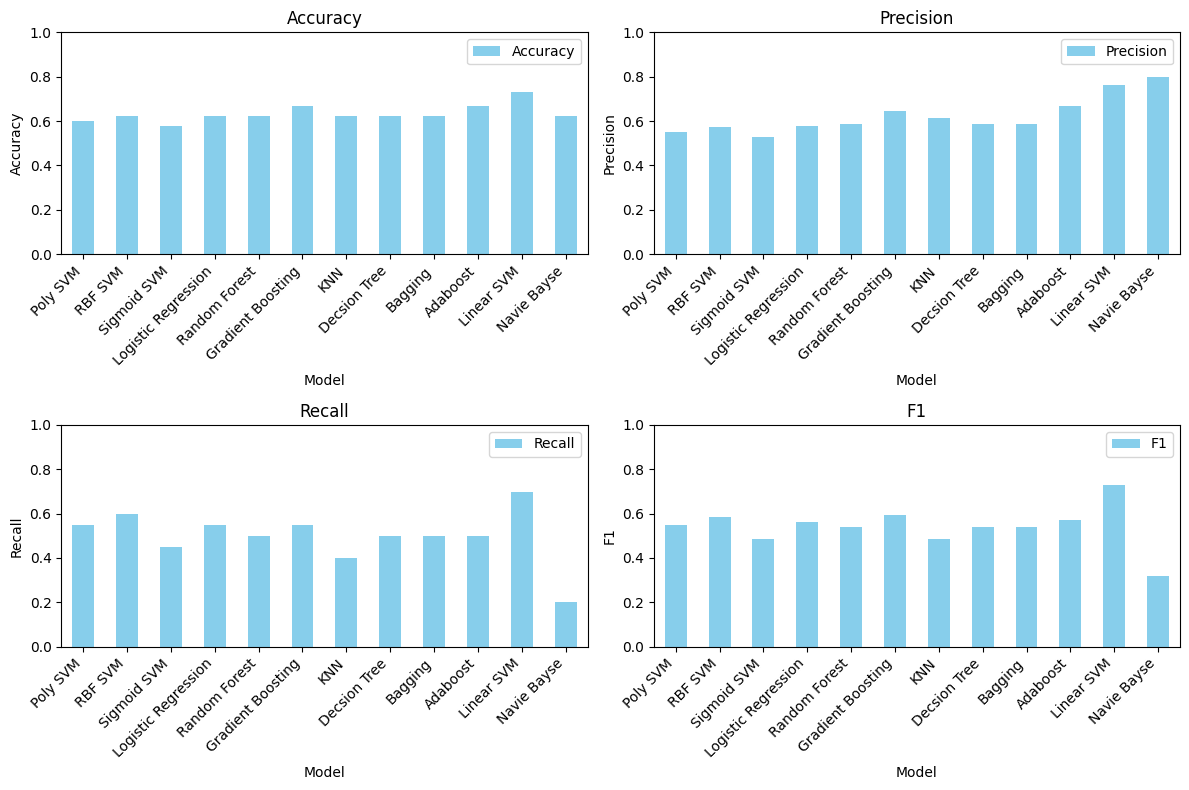

In [33]:
metrics_df = pandas.DataFrame(metrics_list)

# Plot bar charts for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i // 2, i % 2]
    metrics_df.plot(kind='bar', x='Model', y=metric, ax=ax, color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
    ax.set_ylim(0, 1)
    
    max_value = 1
    for p in ax.patches:
        percentage = p.get_height() / max_value * 100

plt.tight_layout()
plt.show()

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


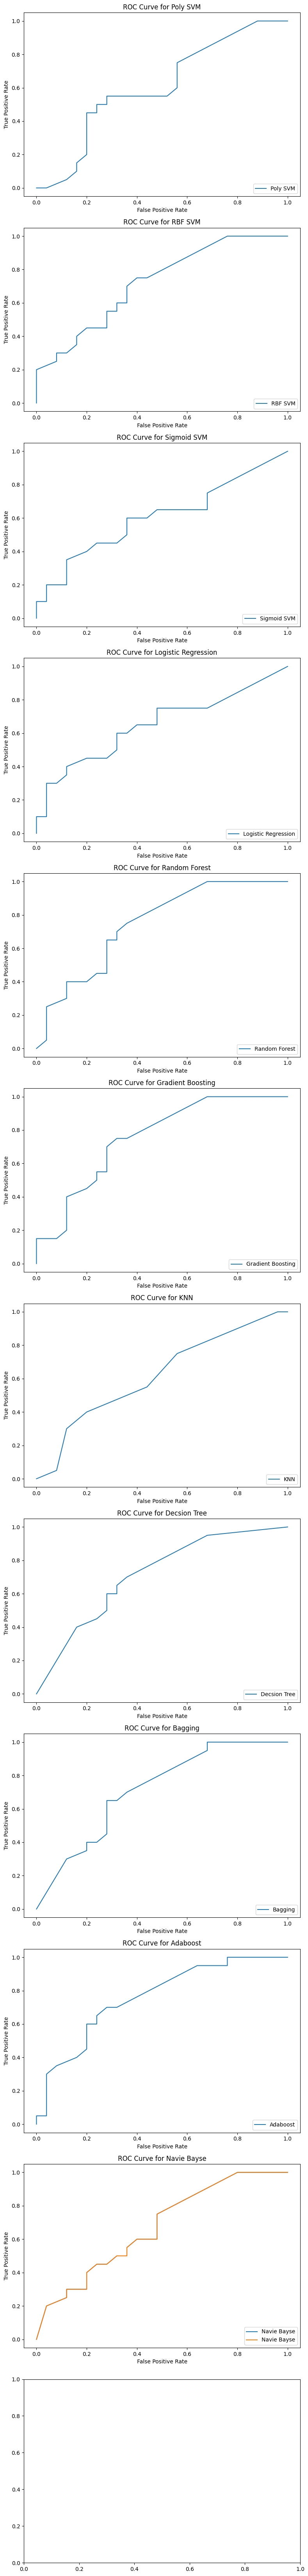

In [34]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=len(models) + len(modelsScaled), ncols=1, figsize=(8, 6*(len(models) )))

# Define a function to plot ROC curve
def plot_roc_curve(model, name, ax):
    if hasattr(model, "decision_function"):
        if name == "Linear SVM":
            y_score = model.decision_function(X_testS)  # For Linear SVM
        else:
            y_score = model.decision_function(X_test)  # For models with decision_function method
    elif hasattr(model, "predict_proba"):
        if name == "Navie Bayse":
            y_score = model.predict_proba(X_test.toarray())[:, 1]  # For Naive Bayes
        else:
            y_score = model.predict_proba(X_test)[:, 1]  # For models with predict_proba method
    else:
        y_score = model.predict(X_test)  # Use predictions as a fallback
        
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=name).plot(ax=ax)  # Set the label to the model name
    ax.set_title(f"ROC Curve for {name}")


for idx, (name, model) in enumerate(models.items()):
    ax = axs[idx]
    plot_roc_curve(model, name, ax)

for idx, (name, model) in enumerate(bModels.items()):
    ax = axs[len(models) + idx]
    plot_roc_curve(model, name, ax)

plt.tight_layout()
plt.show()


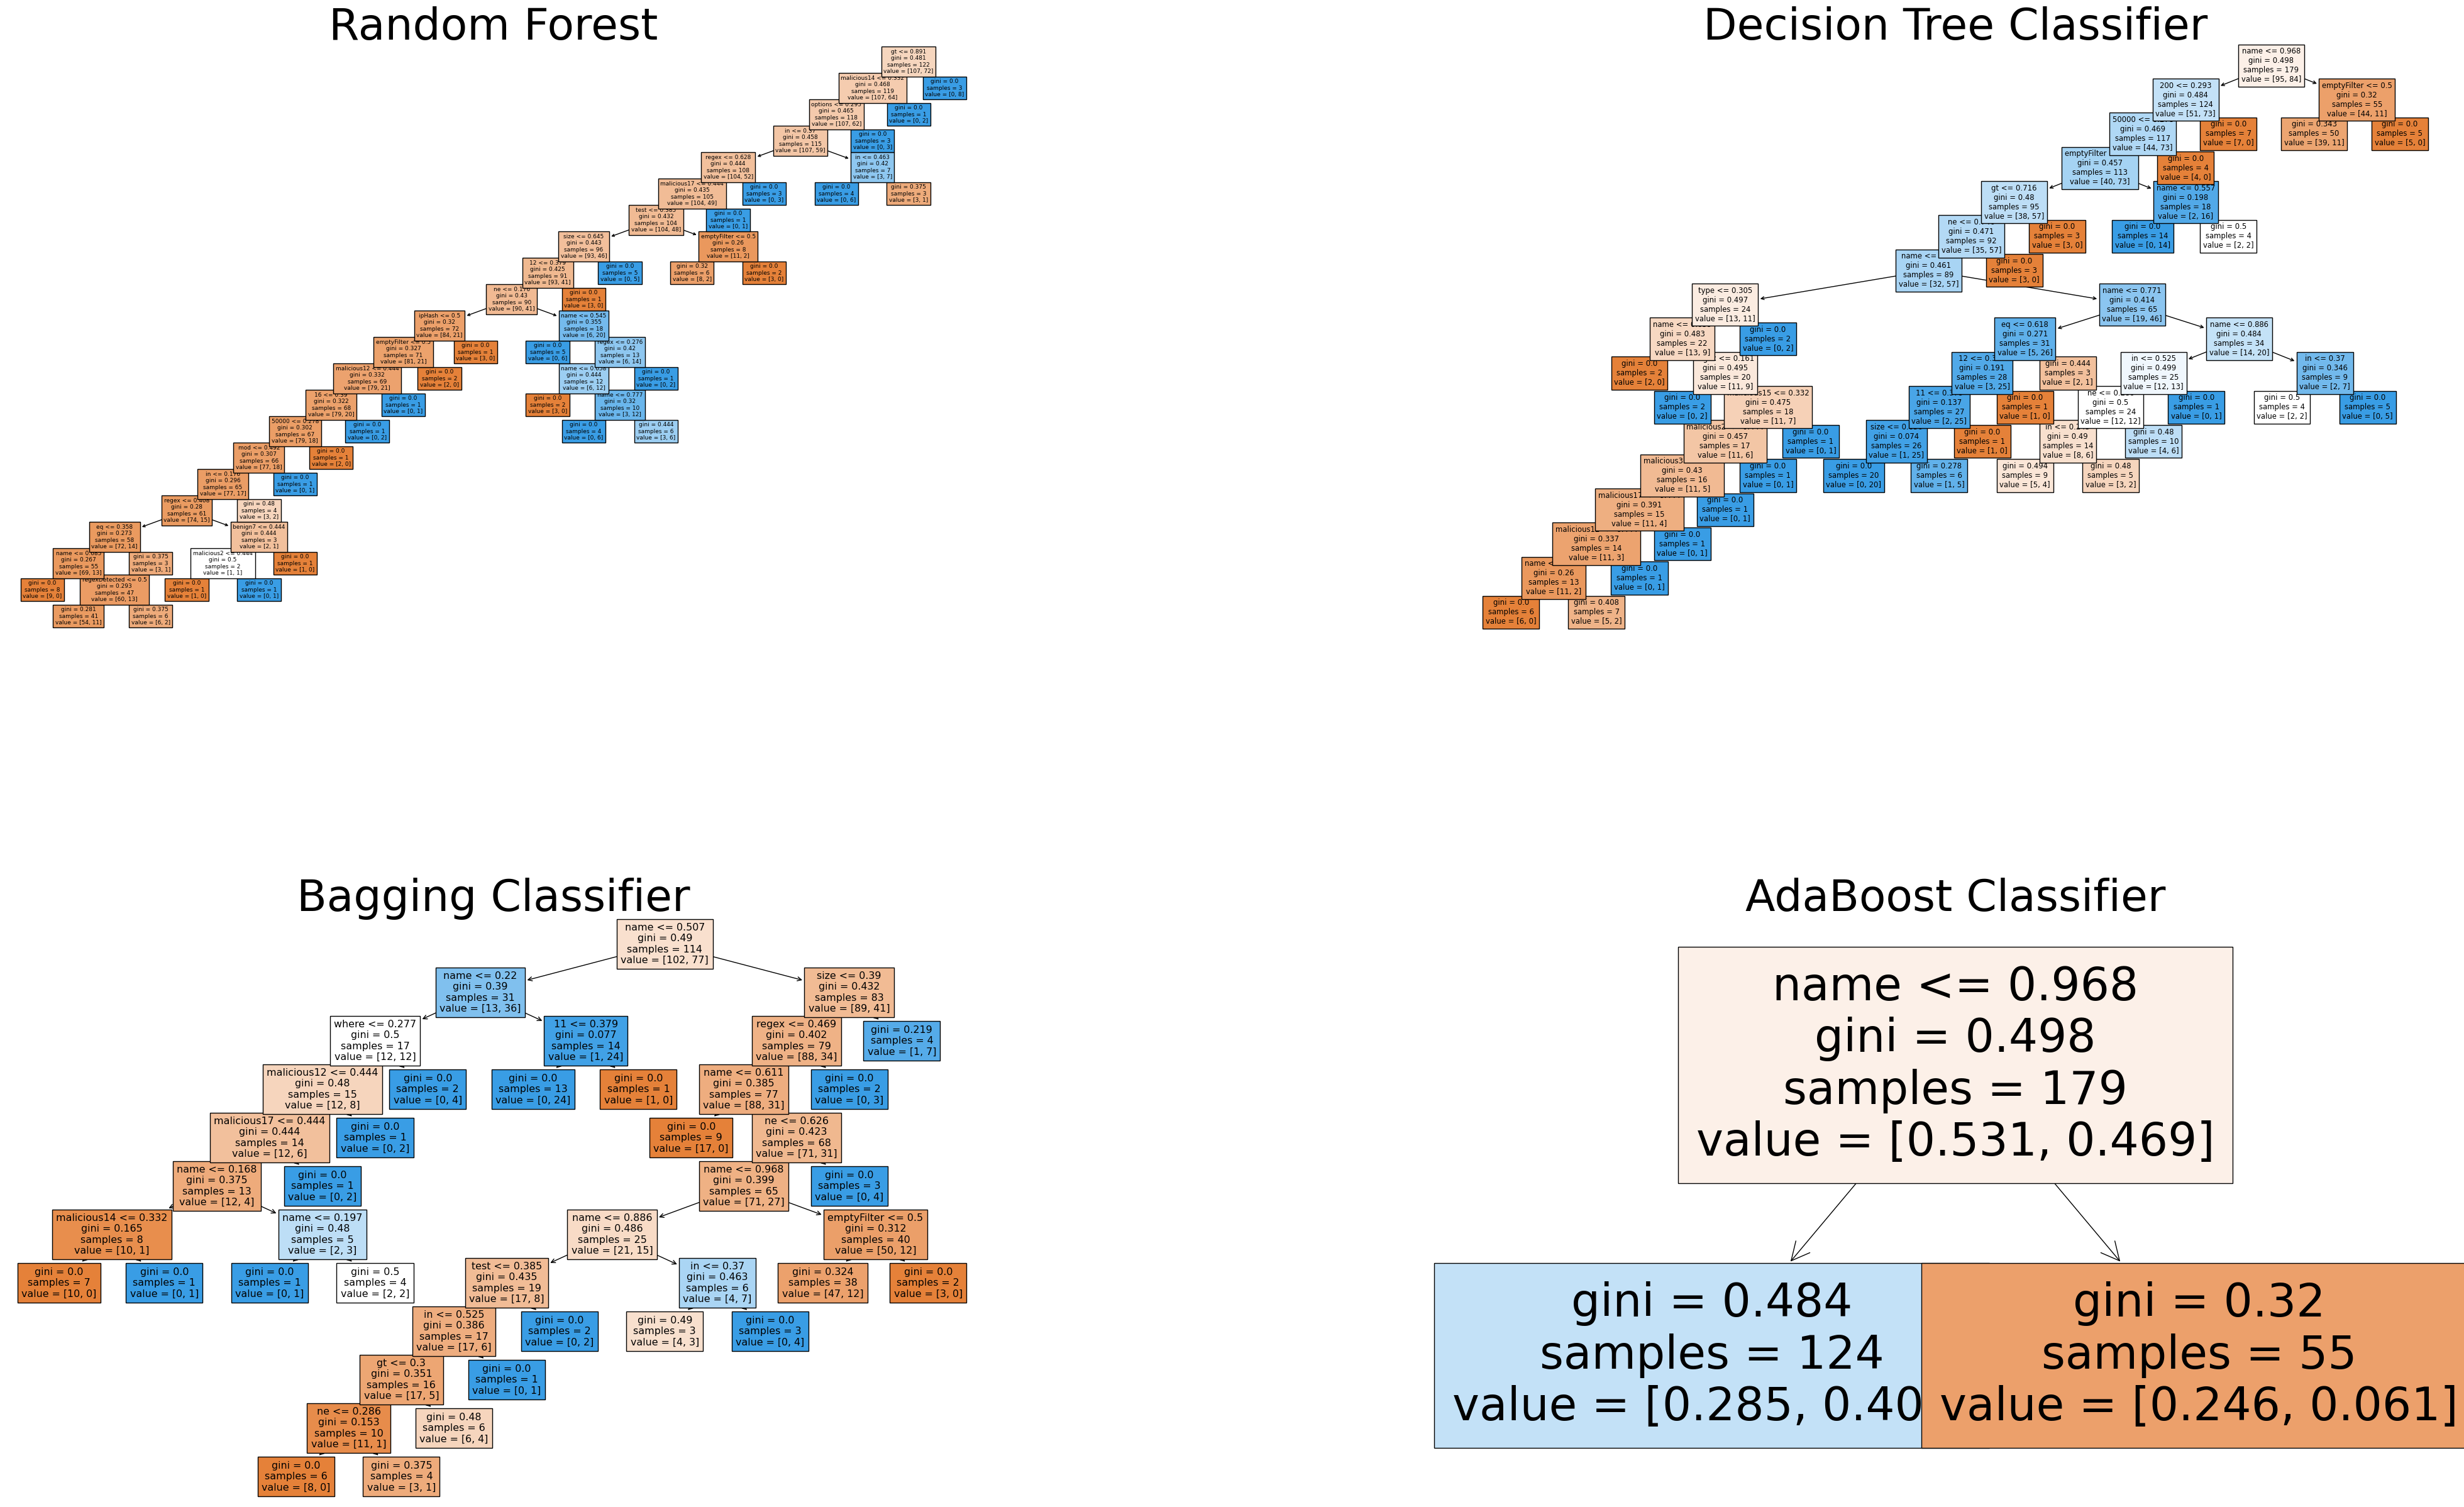

In [35]:
vectorized_feature_names = vectorizer.get_feature_names_out()

# Combined feature names
combined_feature_names = np.concatenate((vectorized_feature_names, ['ipHash','port','emptyFilter','regexDetected','whereDetected','nullArgument','logicOperator','planningTimeMicros','cpuNanos']))
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(50, 30))

# Plot the first decision tree
plot_tree(randF_A.estimators_[0], ax=axes[0, 0], filled=True, feature_names=combined_feature_names)
axes[0, 0].set_title('Random Forest', fontsize=50)

# Plot the second decision tree
plot_tree(dt_clf, ax=axes[0, 1], filled=True, feature_names=combined_feature_names)
axes[0, 1].set_title('Decision Tree Classifier', fontsize=50)

# Plot the third decision tree
plot_tree(bag_dt.estimators_[0], ax=axes[1, 0], filled=True, feature_names=combined_feature_names)
axes[1, 0].set_title('Bagging Classifier', fontsize=50)

# Plot the fourth decision tree
plot_tree(ada_dt.estimators_[0], ax=axes[1, 1], filled=True, feature_names=combined_feature_names)
axes[1, 1].set_title('AdaBoost Classifier', fontsize=50)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Display the figure
plt.show()

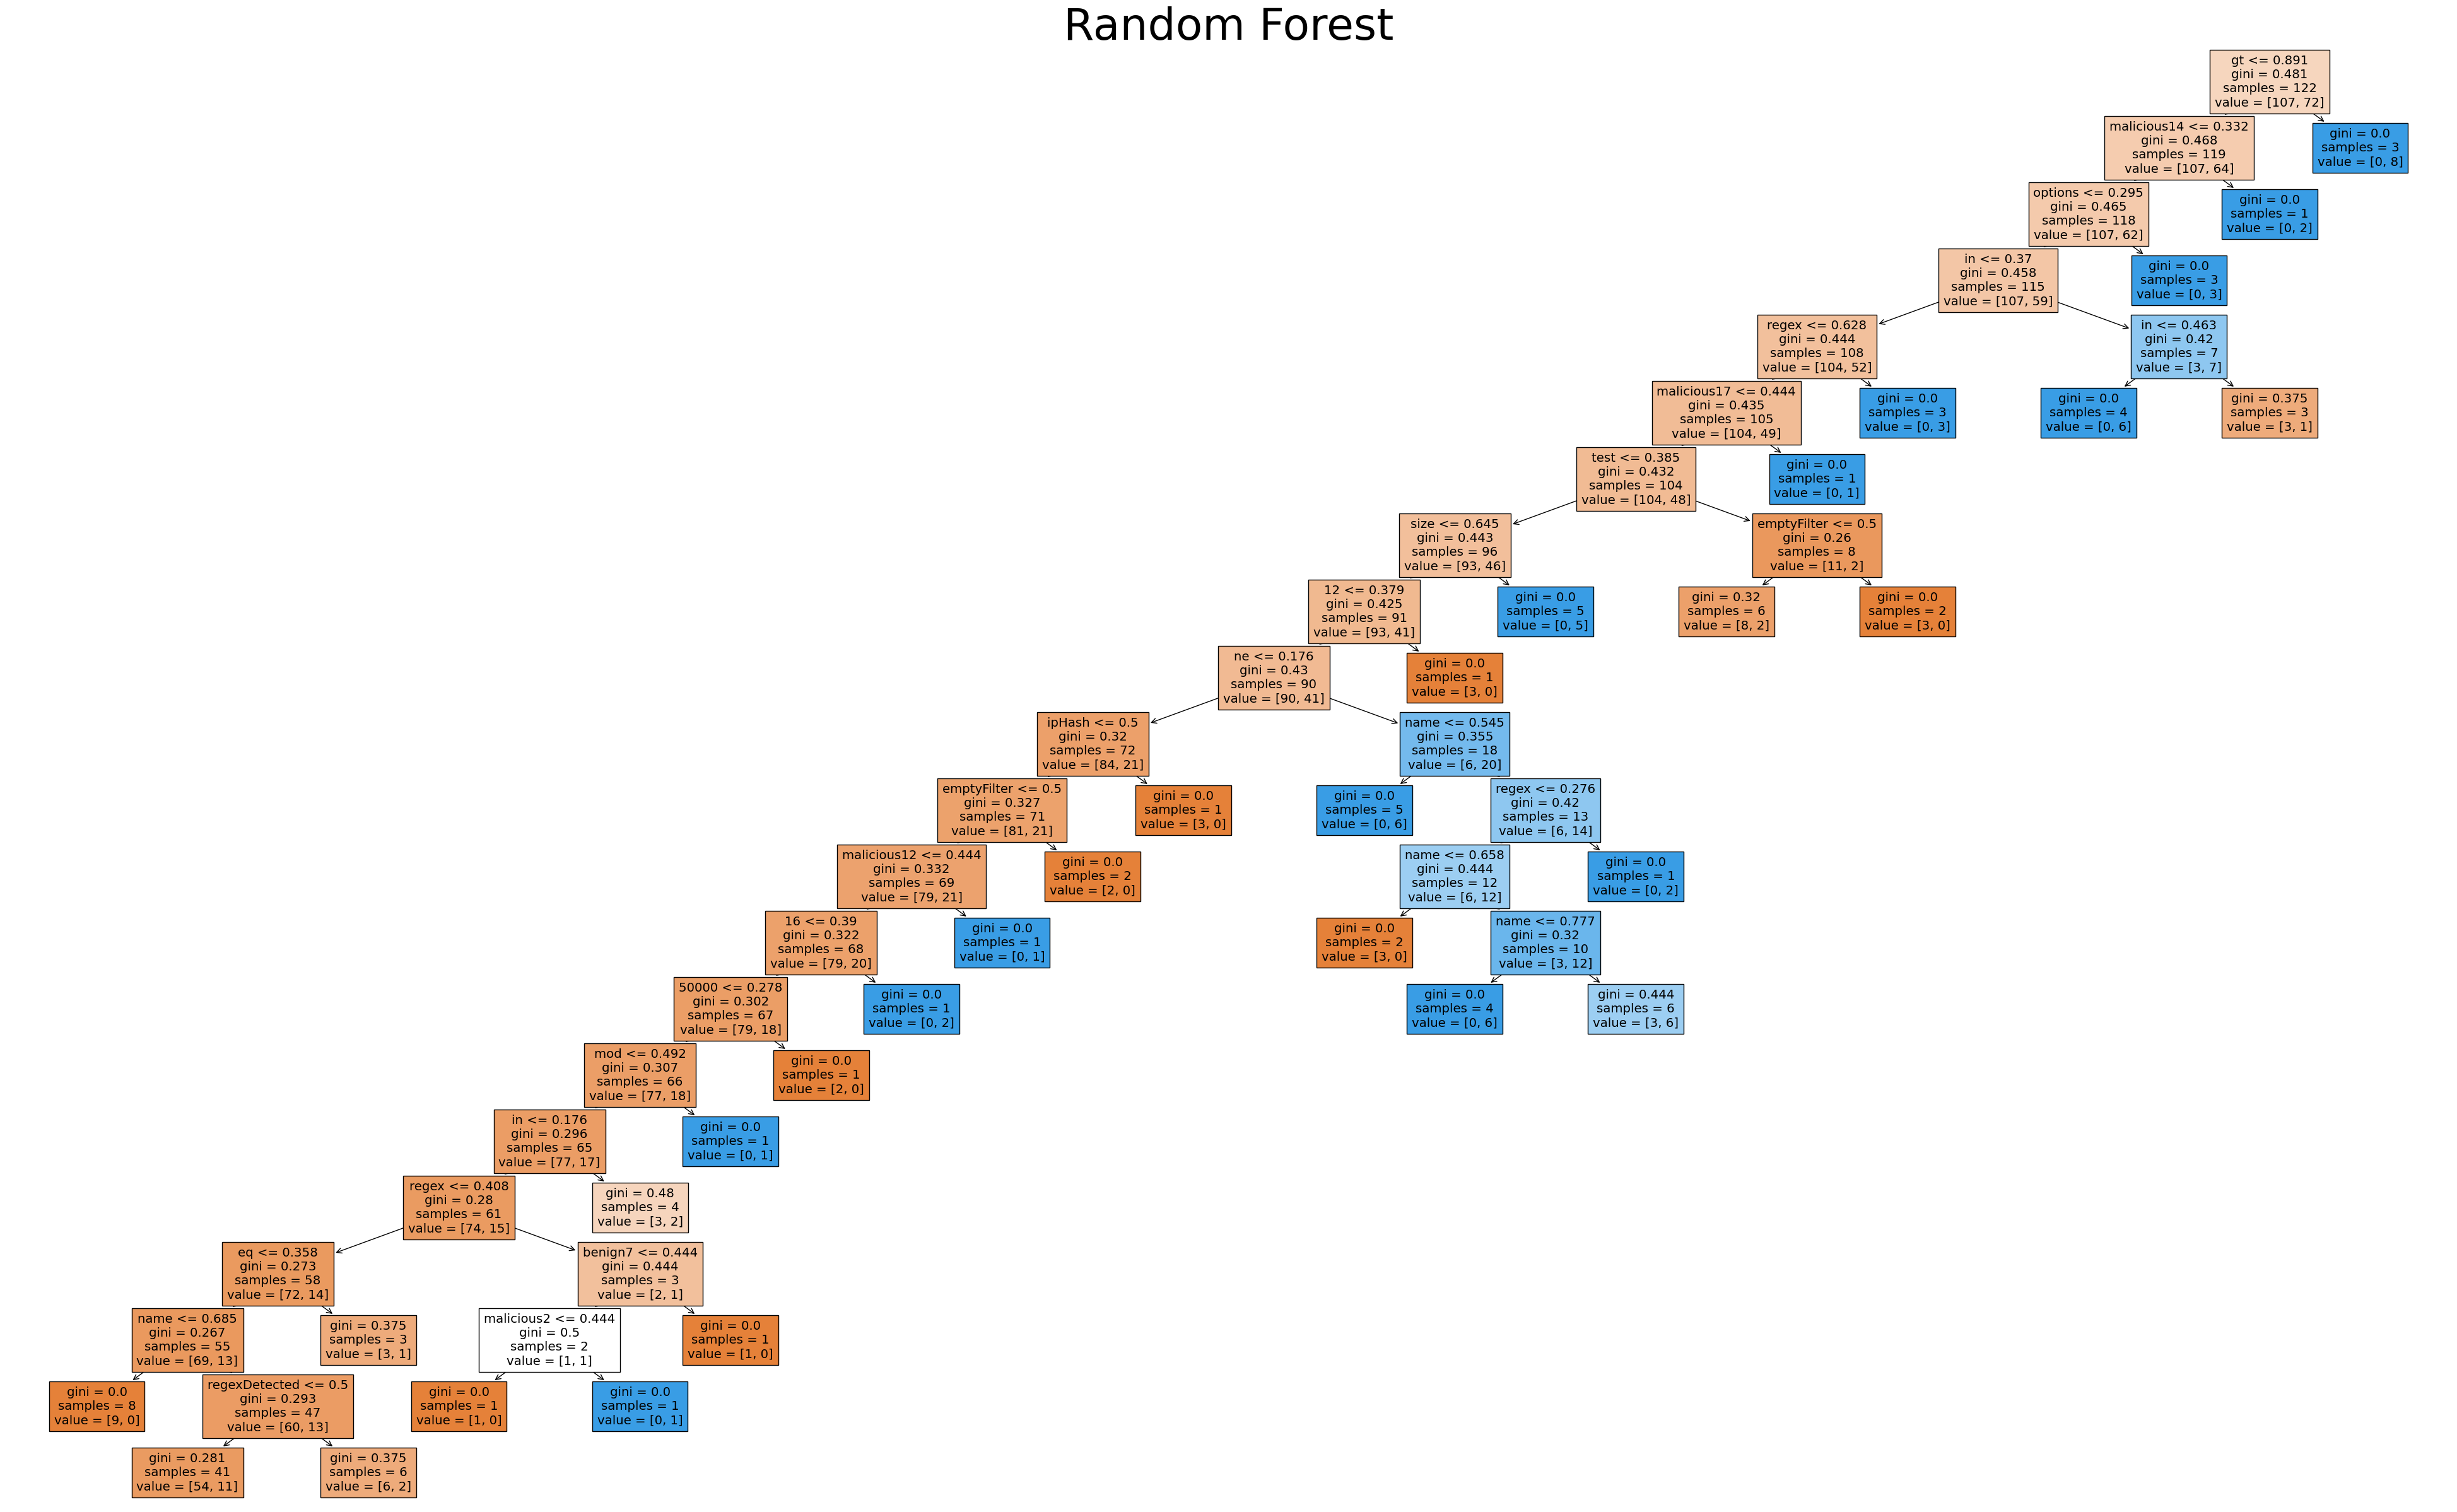

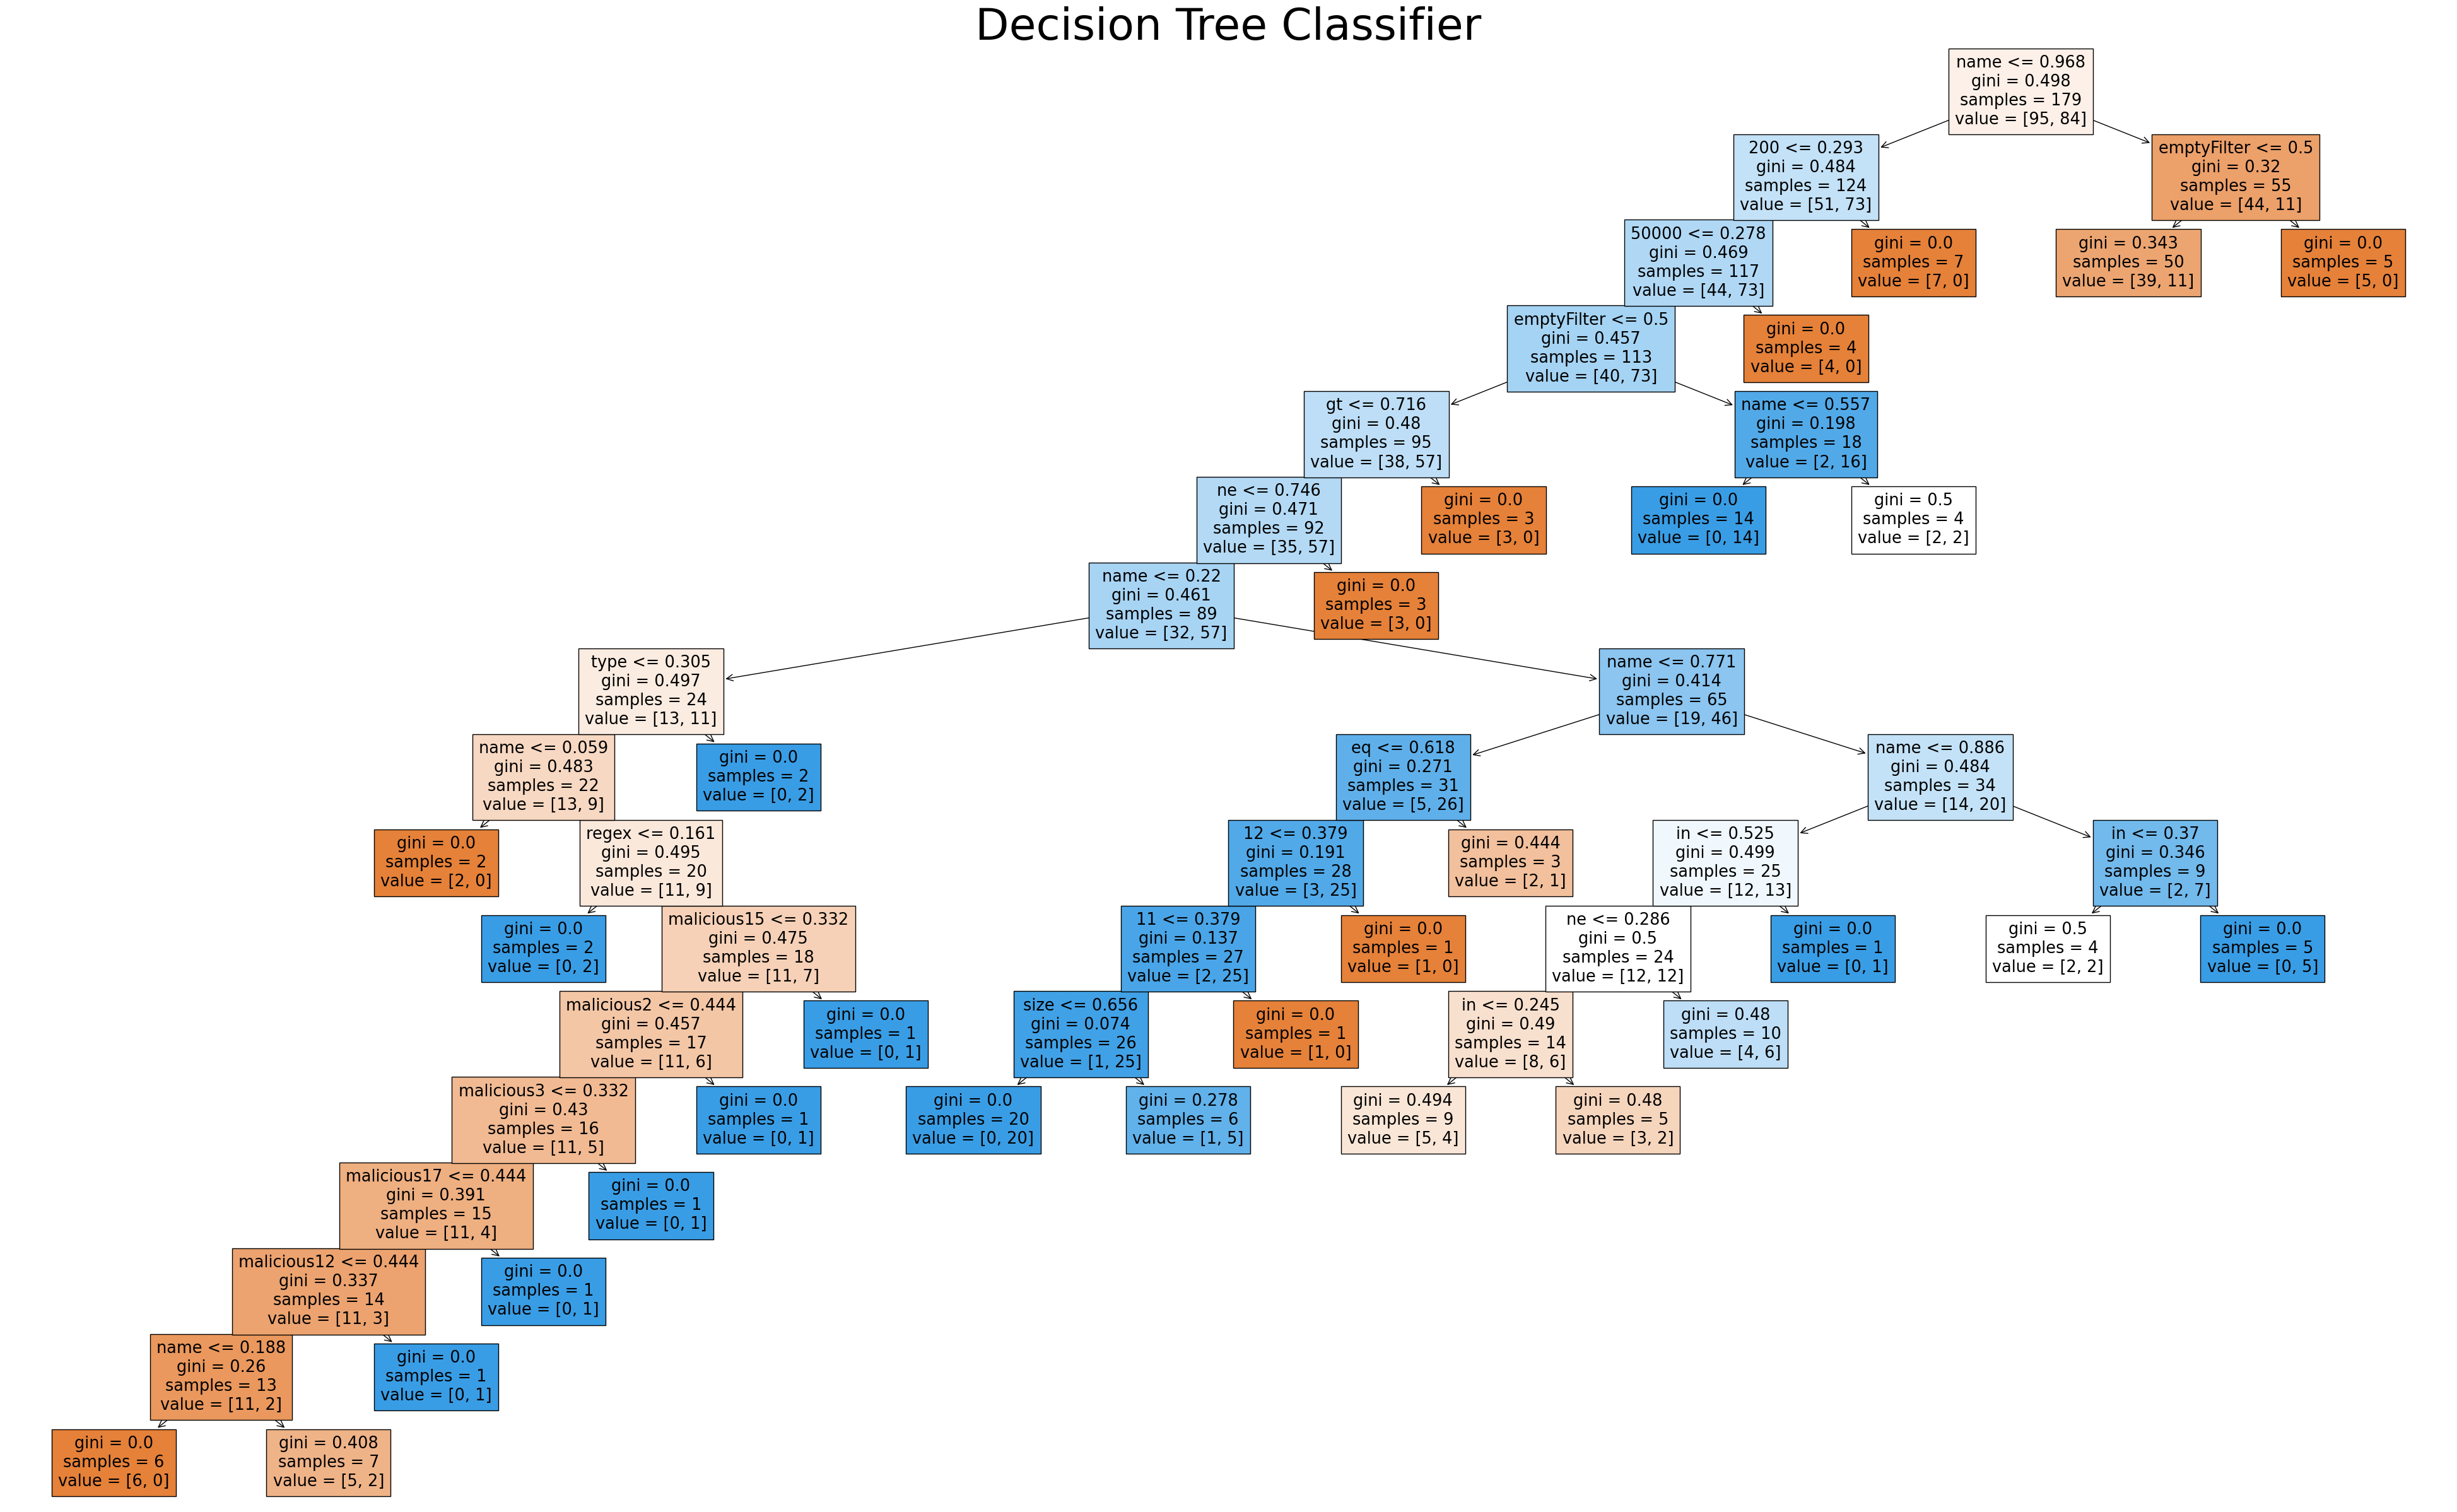

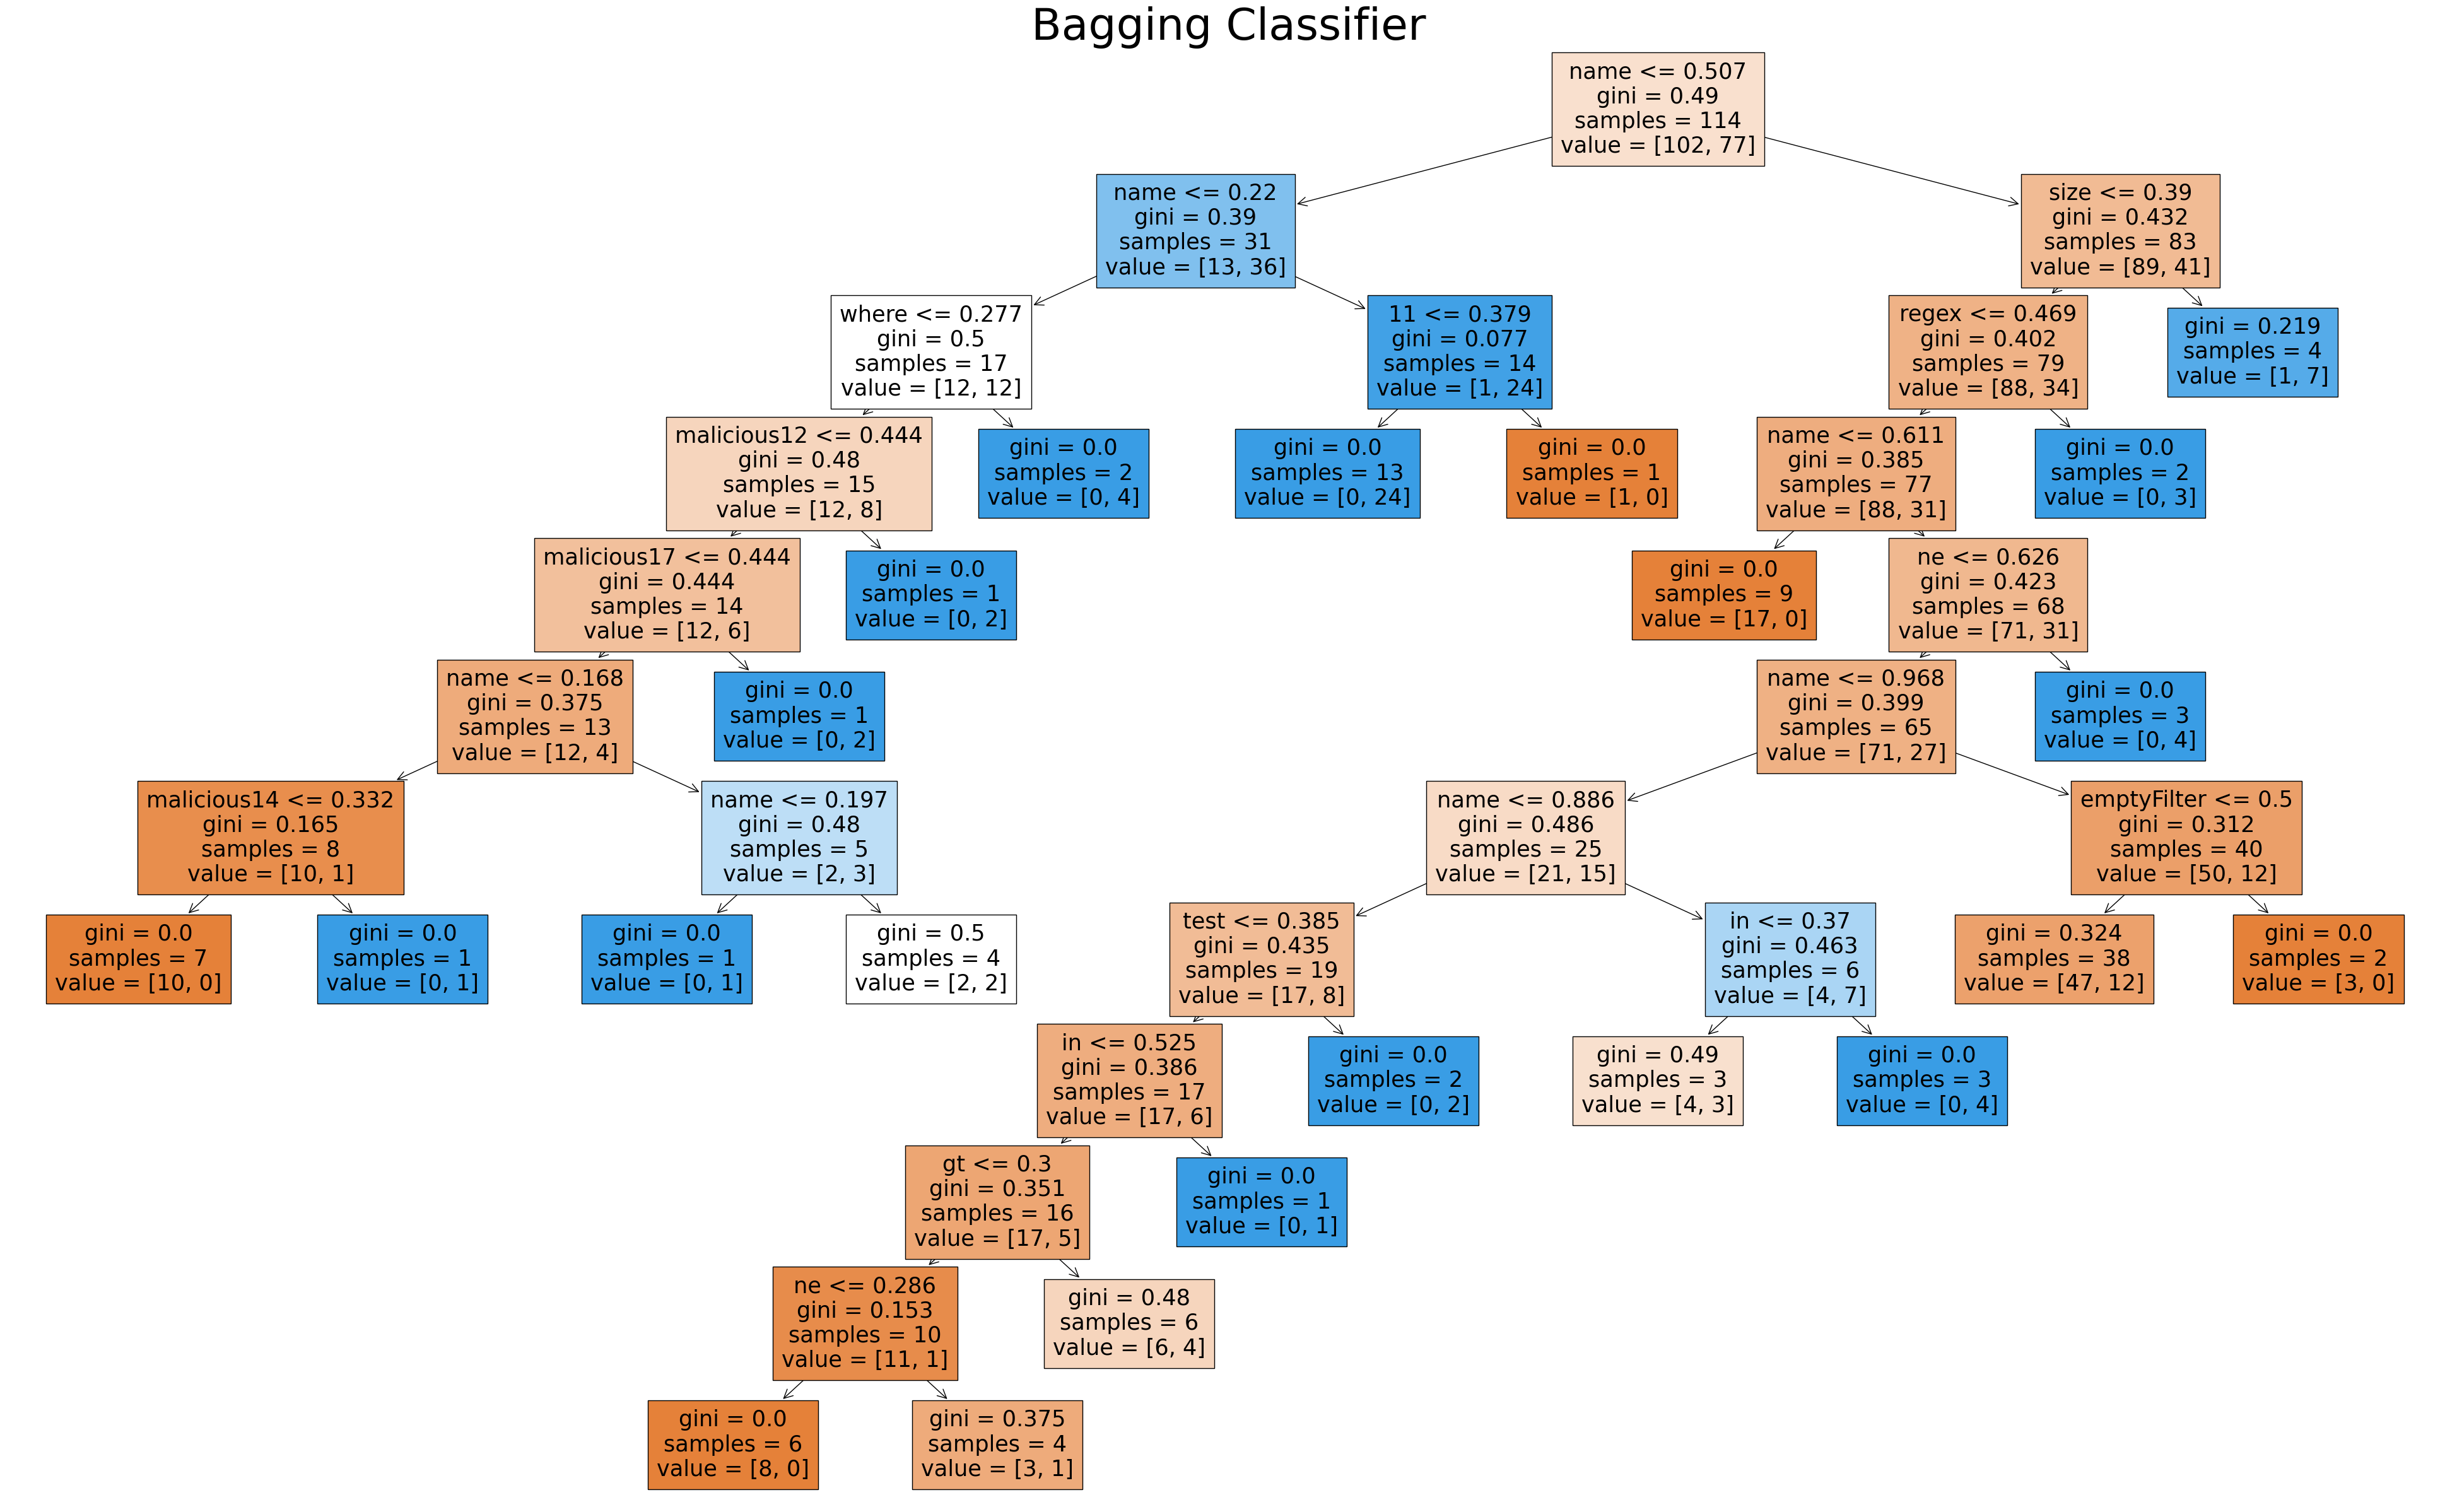

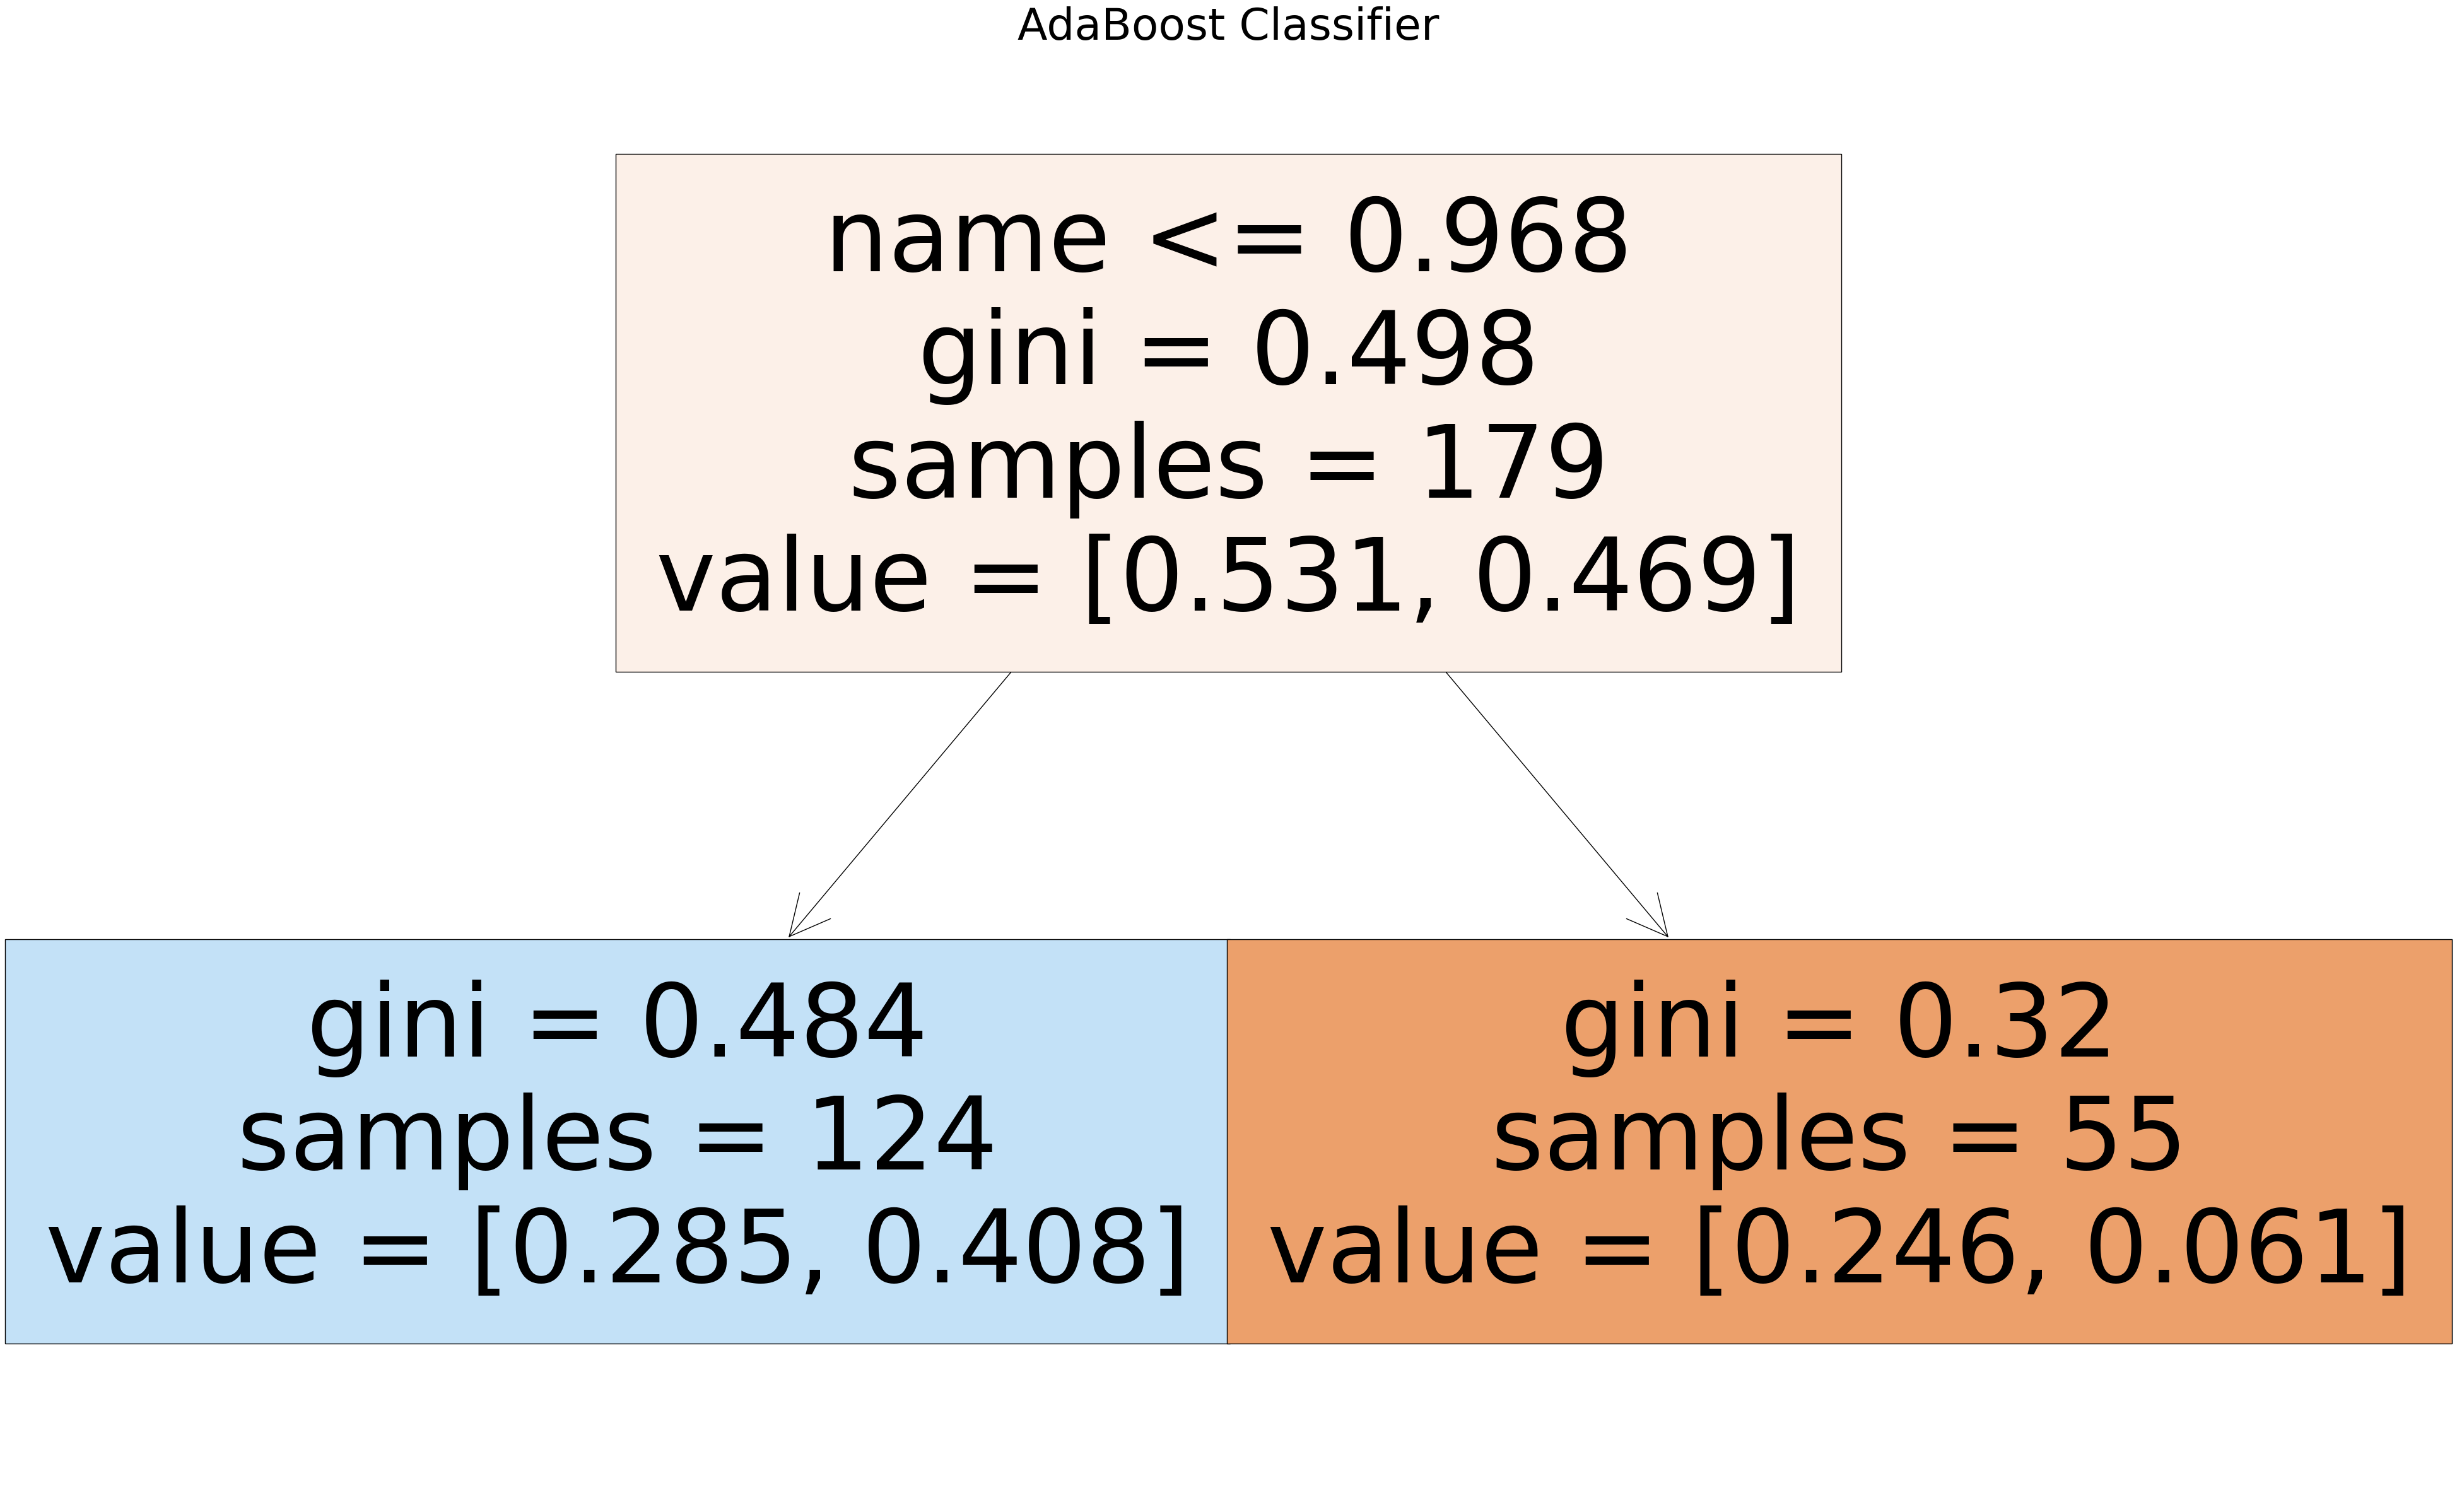

In [36]:
plt.figure(figsize=(50, 30))
plot_tree(randF_A.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('Random Forest', fontsize=50)
plt.show()

# Plot the second decision tree
plt.figure(figsize=(50, 30))
plot_tree(dt_clf, filled=True, feature_names=combined_feature_names)
plt.title('Decision Tree Classifier', fontsize=50)
plt.show()

# Plot the third decision tree
plt.figure(figsize=(50, 30))
plot_tree(bag_dt.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('Bagging Classifier', fontsize=50)
plt.show()

# Plot the fourth decision tree
plt.figure(figsize=(50, 30))
plot_tree(ada_dt.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('AdaBoost Classifier', fontsize=50)
plt.show()